In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd

df = pd.read_csv("supermarket_inventory_data.csv")

df.head()

,Date,Store_ID,Store_Location,Product_ID,Product_Category,Product_Name,Supplier,Unit_Price,Units_Sold_Daily,Current_Stock_Level,...,Reorder_Quantity,Lead_Time_Days,Promotion,Discount_Percentage,Holiday,Day_of_Week,Month,Stockout_Flag,Stockout_Risk,Units_Sold_Future
0,1/1/2023,STR_001,North Judithbury,PROD_0001,Groceries,Present Value,Blair PLC,301.34,28,89,...,124,7,No,0.0,Yes,6,1,No,Low,26
1,1/2/2023,STR_001,North Judithbury,PROD_0001,Groceries,Present Value,Blair PLC,301.34,16,73,...,124,7,No,0.0,No,0,1,No,Low,16
2,1/3/2023,STR_001,North Judithbury,PROD_0001,Groceries,Present Value,Blair PLC,301.34,21,52,...,124,7,No,0.0,No,1,1,No,Low,21
3,1/4/2023,STR_001,North Judithbury,PROD_0001,Groceries,Present Value,Blair PLC,301.34,21,31,...,124,7,No,0.0,No,2,1,No,Low,18
4,1/5/2023,STR_001,North Judithbury,PROD_0001,Groceries,Present Value,Blair PLC,301.34,22,133,...,124,7,No,0.0,No,3,1,No,Low,21


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 43800 non-null  object 
 1   Store_ID             43800 non-null  object 
 2   Store_Location       43800 non-null  object 
 3   Product_ID           43800 non-null  object 
 4   Product_Category     43800 non-null  object 
 5   Product_Name         43800 non-null  object 
 6   Supplier             43800 non-null  object 
 7   Unit_Price           43800 non-null  float64
 8   Units_Sold_Daily     43800 non-null  int64  
 9   Current_Stock_Level  43800 non-null  int64  
 10  Reorder_Level        43800 non-null  int64  
 11  Reorder_Quantity     43800 non-null  int64  
 12  Lead_Time_Days       43800 non-null  int64  
 13  Promotion            43800 non-null  object 
 14  Discount_Percentage  43800 non-null  float64
 15  Holiday              43800 non-null 

In [10]:
df.isnull().sum().sort_values(ascending=False)


,0
Date,0
Store_ID,0
Store_Location,0
Product_ID,0
Product_Category,0
Product_Name,0
Supplier,0
Unit_Price,0
Units_Sold_Daily,0
Current_Stock_Level,0


In [11]:
df['Date'] = pd.to_datetime(df['Date'])


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 43800 non-null  datetime64[ns]
 1   Store_ID             43800 non-null  object        
 2   Store_Location       43800 non-null  object        
 3   Product_ID           43800 non-null  object        
 4   Product_Category     43800 non-null  object        
 5   Product_Name         43800 non-null  object        
 6   Supplier             43800 non-null  object        
 7   Unit_Price           43800 non-null  float64       
 8   Units_Sold_Daily     43800 non-null  int64         
 9   Current_Stock_Level  43800 non-null  int64         
 10  Reorder_Level        43800 non-null  int64         
 11  Reorder_Quantity     43800 non-null  int64         
 12  Lead_Time_Days       43800 non-null  int64         
 13  Promotion            43800 non-

In [12]:
duplicates_count = df.duplicated().sum()
duplicates_count


np.int64(0)

In [14]:
key_dups = df.duplicated(subset=['Date', 'Store_ID', 'Product_ID']).sum()
key_dups


np.int64(0)

In [16]:
df['Product_ID'].nunique()


20

In [17]:
df['Product_Category'].nunique()


6

In [13]:
df['Product_Category'].value_counts()


,count
Product_Category,
Electronics,8760
Beauty,8760
Home & Garden,6570
Groceries,6570
Clothing,6570
Toys,6570


In [14]:
df['Units_Sold_Daily'].describe()


,Units_Sold_Daily
count,43800.000000
mean,21.284247
std,10.286005
min,2.000000
25%,13.000000
50%,20.000000
75%,28.000000
max,104.000000


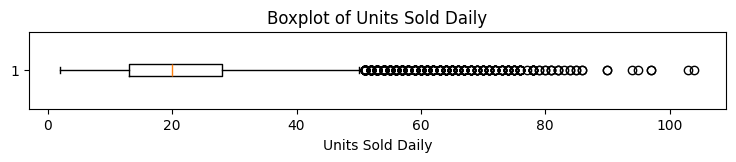

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 1))
plt.boxplot(df['Units_Sold_Daily'], vert=False)
plt.title('Boxplot of Units Sold Daily')
plt.xlabel('Units Sold Daily')
plt.show()


In [16]:
df['Promotion'].value_counts()


,count
Promotion,
No,41636
Yes,2164


In [17]:
df.groupby('Promotion')['Units_Sold_Daily'].mean()


,Units_Sold_Daily
Promotion,
No,20.447233
Yes,37.388632


<Figure size 600x300 with 0 Axes>

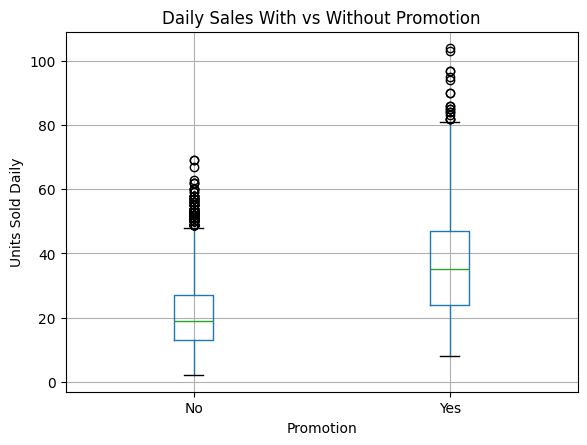

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
df.boxplot(column='Units_Sold_Daily', by='Promotion')
plt.title('Daily Sales With vs Without Promotion')
plt.suptitle('')
plt.xlabel('Promotion')
plt.ylabel('Units Sold Daily')
plt.show()


In [19]:
df['Holiday'].value_counts()


,count
Holiday,
No,43440
Yes,360


In [20]:
df.groupby('Holiday')['Units_Sold_Daily'].mean()


,Units_Sold_Daily
Holiday,
No,21.187040
Yes,33.013889


<Figure size 600x300 with 0 Axes>

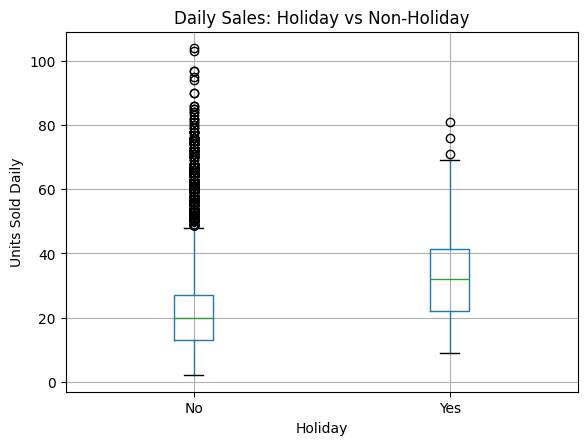

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
df.boxplot(column='Units_Sold_Daily', by='Holiday')
plt.title('Daily Sales: Holiday vs Non-Holiday')
plt.suptitle('')
plt.xlabel('Holiday')
plt.ylabel('Units Sold Daily')
plt.show()


In [22]:
df.groupby('Month')['Units_Sold_Daily'].mean().sort_index()


,Units_Sold_Daily
Month,
1,27.277957
2,25.189766
3,22.599462
4,19.487500
5,16.791667
6,15.404167
7,15.673656
8,17.180376
9,20.119444


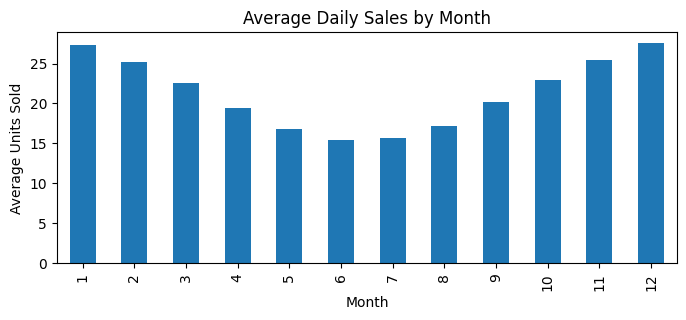

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
df.groupby('Month')['Units_Sold_Daily'].mean().plot(kind='bar')
plt.title('Average Daily Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Units Sold')
plt.show()


In [25]:
df[['Current_Stock_Level', 'Units_Sold_Daily']].corr()


,Current_Stock_Level,Units_Sold_Daily
Current_Stock_Level,1.000000,0.007866
Units_Sold_Daily,0.007866,1.000000


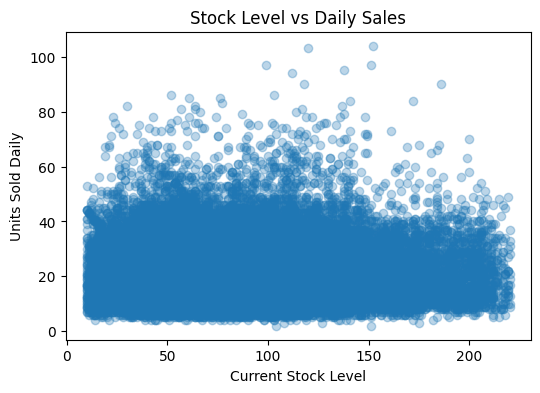

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(df['Current_Stock_Level'], df['Units_Sold_Daily'], alpha=0.3)
plt.title('Stock Level vs Daily Sales')
plt.xlabel('Current Stock Level')
plt.ylabel('Units Sold Daily')
plt.show()

In [31]:
df['Stockout_Risk'].value_counts(normalize=True)


,proportion
Stockout_Risk,
Low,1.0


In [32]:
target = 'Units_Sold_Future'


In [33]:
candidate_features = [
    'Store_ID',
    'Product_Category',
    'Unit_Price',
    'Units_Sold_Daily',
    'Current_Stock_Level',
    'Reorder_Level',
    'Reorder_Quantity',
    'Lead_Time_Days',
    'Promotion',
    'Discount_Percentage',
    'Holiday',
    'Day_of_Week',
    'Month'
]
candidate_features


['Store_ID',
 'Product_Category',
 'Unit_Price',
 'Units_Sold_Daily',
 'Current_Stock_Level',
 'Reorder_Level',
 'Reorder_Quantity',
 'Lead_Time_Days',
 'Promotion',
 'Discount_Percentage',
 'Holiday',
 'Day_of_Week',
 'Month']

In [36]:
X = df[candidate_features]
X.head(7)


,Store_ID,Product_Category,Unit_Price,Units_Sold_Daily,Current_Stock_Level,Reorder_Level,Reorder_Quantity,Lead_Time_Days,Promotion,Discount_Percentage,Holiday,Day_of_Week,Month
0,STR_001,Groceries,301.34,28,89,28,124,7,No,0.0,Yes,6,1
1,STR_001,Groceries,301.34,16,73,28,124,7,No,0.0,No,0,1
2,STR_001,Groceries,301.34,21,52,28,124,7,No,0.0,No,1,1
3,STR_001,Groceries,301.34,21,31,28,124,7,No,0.0,No,2,1
4,STR_001,Groceries,301.34,22,133,28,124,7,No,0.0,No,3,1
5,STR_001,Groceries,301.34,19,114,28,124,7,No,0.0,No,4,1
6,STR_001,Groceries,301.34,17,97,28,124,7,No,0.0,No,5,1


In [38]:
y = df[target]
y.head(7)


,Units_Sold_Future
0,26
1,16
2,21
3,18
4,21
5,17
6,16


In [39]:
X.shape, y.shape


((43800, 13), (43800,))

In [44]:
df_sorted = df.sort_values('Date')


In [47]:
X_sorted = df_sorted[candidate_features]
y_sorted = df_sorted[target]


In [48]:
split_index = int(len(df_sorted) * 0.8)
split_index


35040

In [49]:
X_train = X_sorted.iloc[:split_index]
X_test  = X_sorted.iloc[split_index:]

y_train = y_sorted.iloc[:split_index]
y_test  = y_sorted.iloc[split_index:]


In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((35040, 13), (8760, 13), (35040,), (8760,))

In [51]:
X_train.dtypes


,0
Store_ID,object
Product_Category,object
Unit_Price,float64
Units_Sold_Daily,int64
Current_Stock_Level,int64
Reorder_Level,int64
Reorder_Quantity,int64
Lead_Time_Days,int64
Promotion,object
Discount_Percentage,float64


In [52]:
categorical_features = [
    'Store_ID',
    'Product_Category',
    'Promotion',
    'Holiday'
]
categorical_features


['Store_ID', 'Product_Category', 'Promotion', 'Holiday']

In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)


In [54]:
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded  = preprocessor.transform(X_test)


In [55]:
X_train_encoded.shape, X_test_encoded.shape


((35040, 22), (8760, 22))

In [57]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_encoded, y_train)


LinearRegression()

In [58]:
y_pred = model.predict(X_test_encoded)


In [63]:
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(2.284277675204223, np.float64(3.8008603577607056), 0.8832249295759528)

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)


In [65]:
rf_model.fit(X_train_encoded, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [66]:
rf_pred = rf_model.predict(X_test_encoded)


In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

rf_mae, rf_rmse, rf_r2


(2.340319471624266, np.float64(3.693842106614223), 0.8897082659646389)

In [68]:
import numpy as np

importances = rf_model.feature_importances_
importances[:10], len(importances)


(array([0.00241473, 0.002314  , 0.00237093, 0.0006985 , 0.00092426,
        0.00101901, 0.00105461, 0.00037983, 0.00122878, 0.00102459]),
 22)

In [69]:
feature_names = preprocessor.get_feature_names_out()
len(feature_names)


22

In [70]:
import pandas as pd

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

feature_importance_df.head(10)


,feature,importance
14,remainder__Units_Sold_Daily,0.900609
15,remainder__Current_Stock_Level,0.027938
21,remainder__Month,0.017328
20,remainder__Day_of_Week,0.011759
16,remainder__Reorder_Level,0.006767
19,remainder__Discount_Percentage,0.005251
17,remainder__Reorder_Quantity,0.005183
13,remainder__Unit_Price,0.005076
18,remainder__Lead_Time_Days,0.003438
0,cat__Store_ID_STR_001,0.002415


In [71]:
print(rf_pred[:10])


[ 9.74 14.09 27.21 21.29 41.66  6.39  6.86  7.61 47.42  6.7 ]


In [72]:
comparison = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': rf_pred[:10]
})

comparison


,Actual,Predicted
0,9,9.74
1,14,14.09
2,29,27.21
3,18,21.29
4,33,41.66
5,6,6.39
6,5,6.86
7,9,7.61
8,39,47.42
9,7,6.70


In [73]:
df_results = df_sorted.copy()

df_results['Predicted_Units_Sold_Future'] = None

df_results.loc[df_results.index[split_index:], 'Predicted_Units_Sold_Future'] = rf_pred


In [80]:
df_results[['Units_Sold_Future', 'Predicted_Units_Sold_Future']].tail()


,Units_Sold_Future,Predicted_Units_Sold_Future
24819,22,19.59
24089,67,62.03
23359,32,29.64
32119,22,26.173333
43799,25,26.31


In [76]:
df_results.to_csv('supermarket_inventory_with_predictions.csv', index=False)
